# Path of Exile game stats data eda2

dates: 2022.04.26 ~ 

This file contains an analysis processing of the game 'Path of Exile' data.

###### Origins of datas from here: 
poe_stats : https://www.kaggle.com/datasets/gagazet/path-of-exile-league-statistic

Data contains stats of 59000 players, from 4th August of 2017 and before now.

---

이 파일은 지난 3 파일에서 하드코어 모드와 일반모드를 나누었던 것에 이어서, 솔로모드와 파티가능모드로 나누어 볼 예정입니다.

# Dataset and libraries 

## data and libraries import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles

df = pd.read_csv('poe_stats_2revisedrank.csv')

pd.options.display.float_format = '{:,.4f}'.format # 수 표현을 일부 바꿈


In [2]:
df.nunique()

rank             14981
dead                 2
online               2
name             58286
level               48
class               26
id               59776
experience       54124
account          37123
challenges          37
twitch            9613
ladder               4
special_class        2
stat_Str             2
stat_Int             2
stat_Dex             2
stats_num            3
dtype: int64

In [3]:
df.isnull().sum()

rank                 0
dead                 0
online               0
name                 0
level                0
class                0
id                   0
experience           0
account              0
challenges           0
twitch           43476
ladder               0
special_class        0
stat_Str             0
stat_Int             0
stat_Dex             0
stats_num            0
dtype: int64

In [4]:
df.ladder.unique()

array(['Harbinger', 'SSF Harbinger HC', 'Hardcore Harbinger',
       'SSF Harbinger'], dtype=object)

In [5]:
pd.options.display.float_format = '{:,.2f}'.format
df.describe()

,rank,level,experience,challenges,special_class,stat_Str,stat_Int,stat_Dex,stats_num
count,"59,776.00","59,776.00","59,776.00","59,776.00","59,776.00","59,776.00","59,776.00","59,776.00","59,776.00"
mean,"7,472.54",85.42,"1,825,786,027.36",25.76,0.99,0.58,0.42,0.51,1.51
std,"4,314.06",11.29,"1,094,747,934.61",8.44,0.09,0.49,0.49,0.50,0.61
min,1.00,53.00,"77,909,816.00",4.00,0.00,0.00,0.00,0.00,1.00
25%,"3,736.75",78.00,"777,469,746.25",19.00,1.00,0.00,0.00,0.00,1.00
50%,"7,472.50",90.00,"1,934,009,687.00",25.00,1.00,1.00,0.00,1.00,1.00
75%,"11,208.25",95.00,"2,876,116,901.00",33.00,1.00,1.00,1.00,1.00,2.00
max,"14,981.00",100.00,"4,250,334,444.00",40.00,1.00,1.00,1.00,1.00,3.00


# try: with ladder division (SSF or not)
---
ladder에서 SSF가 달린 모드는 오로지 혼자서만 깨야하는 솔로 플레이 모드이다. 이번에는 그런 SSF 모드와 멀티유저가능 모드를 나누어 보려고 한다.

## SSF dataframe

In [6]:
ssf = df[(df['ladder'] == 'SSF Harbinger')|(df['ladder'] == 'SSF Harbinger hc')]

In [7]:
ssf.describe()

,rank,level,experience,challenges,special_class,stat_Str,stat_Int,stat_Dex,stats_num
count,"14,981.00","14,981.00","14,981.00","14,981.00","14,981.00","14,981.00","14,981.00","14,981.00","14,981.00"
mean,"7,491.00",82.93,"1,248,170,977.66",22.15,0.99,0.58,0.46,0.50,1.54
std,"4,324.79",5.91,"598,147,110.11",7.08,0.07,0.49,0.50,0.50,0.62
min,1.00,73.00,"495,034,029.00",9.00,0.00,0.00,0.00,0.00,1.00
25%,"3,746.00",78.00,"727,879,491.00",16.00,1.00,0.00,0.00,0.00,1.00
50%,"7,491.00",83.00,"1,134,144,651.00",21.00,1.00,1.00,0.00,1.00,1.00
75%,"11,236.00",88.00,"1,656,611,029.00",27.00,1.00,1.00,1.00,1.00,2.00
max,"14,981.00",100.00,"4,250,334,444.00",40.00,1.00,1.00,1.00,1.00,3.00


In [8]:
ssf.describe(include='object')

,name,class,id,account,twitch,ladder
count,14981,14981,14981,14981,2661,14981
unique,14964,26,14981,10214,1713,1
top,Rodrick_Harbinger_SSF,Berserker,c861372da792be0b22c45bf437ccd58437c52e9455e0bf...,Hyperized,adjayjay,SSF Harbinger
freq,4,2290,1,25,9,14981


## non solo dataframe

In [9]:
non_ssf = df[(df['ladder'] == 'Harbinger')|(df['ladder'] == 'Hardcore Harbinger')]

In [10]:
pd.options.display.float_format = '{:,.2f}'.format
non_ssf.describe()

,rank,level,experience,challenges,special_class,stat_Str,stat_Int,stat_Dex,stats_num
count,"29,823.00","29,823.00","29,823.00","29,823.00","29,823.00","29,823.00","29,823.00","29,823.00","29,823.00"
mean,"7,456.25",93.65,"2,707,548,316.85",30.32,1.00,0.57,0.36,0.54,1.47
std,"4,304.65",2.97,"620,079,660.81",6.84,0.01,0.49,0.48,0.50,0.61
min,1.00,89.00,"1,786,638,972.00",8.00,0.00,0.00,0.00,0.00,1.00
25%,"3,728.50",91.00,"2,129,280,019.50",25.00,1.00,0.00,0.00,0.00,1.00
50%,"7,456.00",94.00,"2,835,787,324.00",30.00,1.00,1.00,0.00,1.00,1.00
75%,"11,184.00",95.00,"3,031,208,352.50",36.00,1.00,1.00,1.00,1.00,2.00
max,"14,918.00",100.00,"4,250,334,444.00",40.00,1.00,1.00,1.00,1.00,3.00


In [11]:
non_ssf.describe(include='object')

,name,class,id,account,twitch,ladder
count,29823,29823,29823,29823,9916,29823
unique,29652,22,29823,21978,6813,2
top,Xkuz,Berserker,3dcddd59f5088893f734f39686350990dae168cc4f4b00...,supercellj,zen1703,Harbinger
freq,4,4777,1,14,12,14918


### Commentary

전체 데이터에서의 mean을 보자면

    ``` sort    rank      level       experience   challenges  special_class  Str    Int   Dex   stats_num ```

    ``` mean	7,472.54	85.42	1,825,786,027.36	25.76	0.99	0.58	0.42	0.51	1.51 ```

그리고  non_ssf(Harbinger, Harbinger Hardcore) 를 먼저 보자면

    ``` mean	7,456.25	93.65	2,707,548,316.85	30.32	1.00	0.57	0.36	0.54	1.47 ```
그리고 ssf(SSF Harbinger, SSF Harbinger hc)를 보자면

    ``` mean	7,488.75	77.23	947,850,703.36	21.22	0.98	0.59	0.48	0.48	1.56 ```

> 전체적인 수치가 많이 차이나진 않지만 , SSF 모드의 랭커들을 레벨이 더 높았다. 하지만 이 부분은 SSF Harbinger hc 모드의 제한 때문인데, 그 모드는 특정 레벨에 분포가 몰려있는 것을 보아 해당 레벨이 넘는 캐릭터만 입장이 가능한 것으로 보였다. 즉, 해당 모드를 플레이하기 위해서 키운 캐릭터들이 랭크에 올려져있는 것으로 볼 수 있다. 그 캐릭터들이 전체 데이터의 레벨 평균을 많이 낮춘 것이다. 

실제로 ssf 모드의 level 은 전체 평균을 많이 밑도는 것으로 보이고 있다. 혼자 도전하는 모드임에도 불고하고 랭크에 이름을 올린 캐릭터들의 경험치가 많이 적은 것에서도 확인할 수 있는 부분이다.

> 다른 부분들을 살펴보자면 challenge는 ssf 모드가 훨씬 적었다. 위와같은 이유에 더해서 플레이 성향도 있을 것으로 보인다. 다른 사람과 함께 플레이할 경우 각자의 조합을 여러가지로 두고 시도할 가능성이 많지만, 혼자는 어느정도 정해져있기 때문이다. 

심지어 중간값이 30과 20으로 거의 10차이가 나며, 최소 시도로는 8과 4로 두 배 차이가 난다. 15000등 안팎이면 어중간하게 잘하는 사람들은 거의 없을텐데 말이다.

> 또한 특정 계정이 29개나 플레이한 것을 여기서 확인할 수 있다. 잘 하는 사람이 여러 캐릭으로 랭크에 아이디를 올리는 일이 어려운 일이 아니기 때문이다.

> 추가적으로, class에서 전직하기 전의 클래스가 없는 non_ssf 모드와 달리 ssf 모드는 모든 직업이 존재함을 확인할 수 있다. 

> 둘 다 모두, Berserker가 가장 많이 존재하는 것으로 보인다.


## correlation map

<AxesSubplot:>

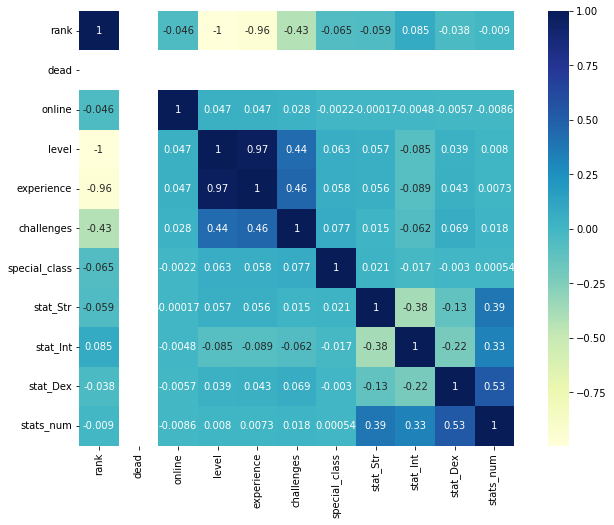

In [12]:
# ssf

plt.rcParams["figure.figsize"] = (12, 8)
sns.heatmap(ssf.corr(), annot = True, cmap = "YlGnBu", square = True)

<AxesSubplot:>

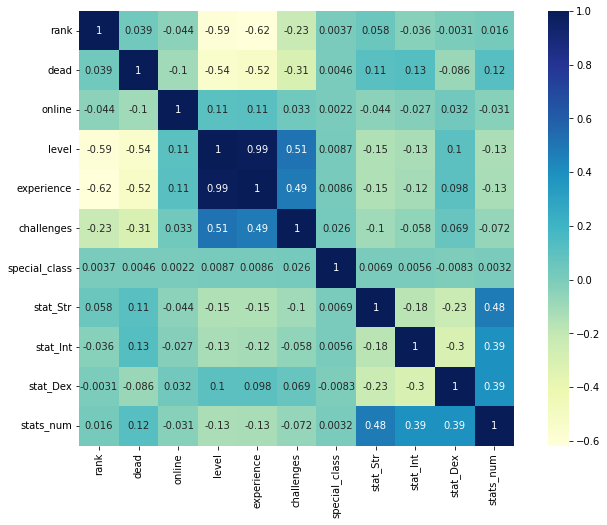

In [13]:
# non_ssf

plt.rcParams["figure.figsize"] = (12, 8)
sns.heatmap(non_ssf.corr(), annot = True, cmap = "YlGnBu", square = True)

## classes

전체 클래스를 대상으로 나누어보는 정도만 진행하며, 상세하게 나누는 (이전에 만든 stat column들을 이용하는 분석)은 다음 파일에서 진행하려 한다.

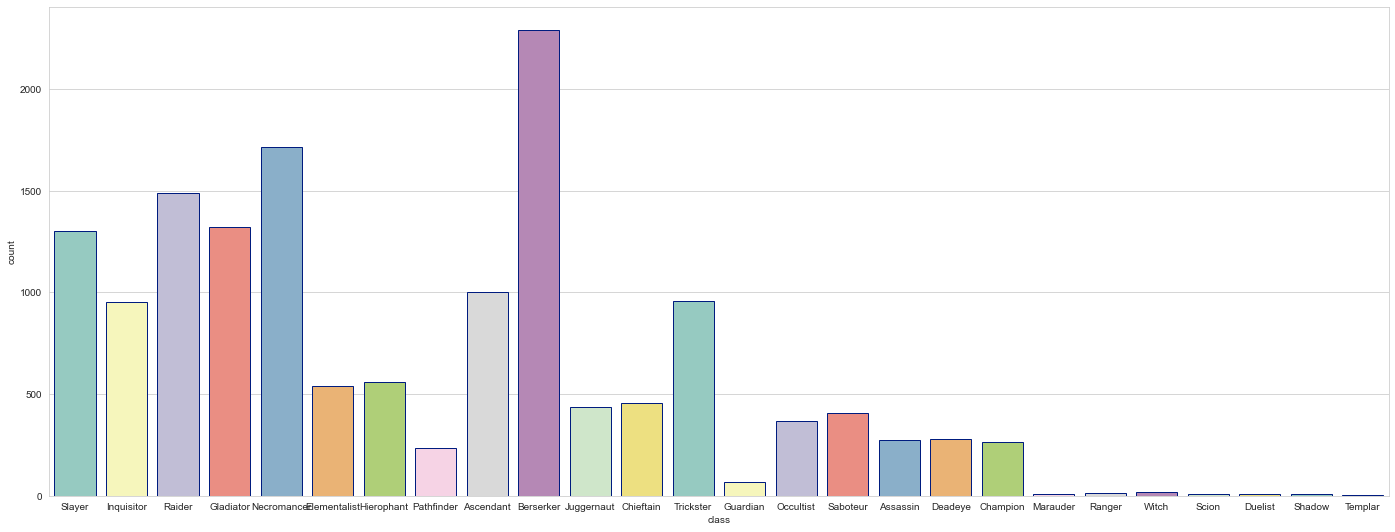

In [14]:
# ssf classes

plt.rcParams["figure.figsize"] = (24, 9)
sns.set_style('whitegrid')
sns.countplot(data = ssf, x = 'class',
              palette="Set3", edgecolor=sns.color_palette("dark", 1)) #palette = Accent
plt.show()

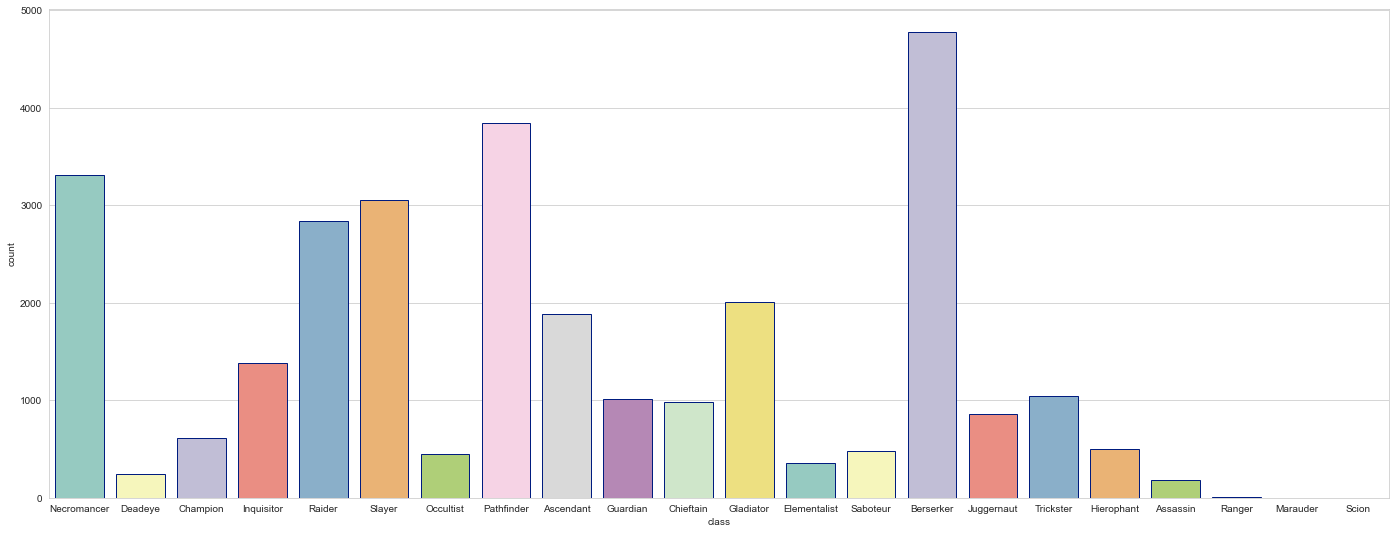

In [15]:
# non_ssf classes

plt.rcParams["figure.figsize"] = (24, 9)
sns.set_style('whitegrid')
sns.countplot(data = non_ssf, x = 'class',
              palette="Set3", edgecolor=sns.color_palette("dark", 1)) #palette = Accent
plt.show()

### Commentary

 전직전의 직업이 존재하지 않는 non_ssf 모드에서도 Ranger, Marauder, Scion이 존재하는 것으로 보이고 있다.

## class-users (클래스별 유저수 number)

In [16]:
# SSF 모드의 클래스별 유저 수

pivot_countuser_class_ssf = ssf.pivot_table(values = 'id', columns = 'class', aggfunc = 'count')
pivot_countuser_class_ssf.transpose()

,id
class,
Ascendant,1000
Assassin,274
Berserker,2290
Champion,262
Chieftain,456
Deadeye,280
Duelist,10
Elementalist,541
Gladiator,1320


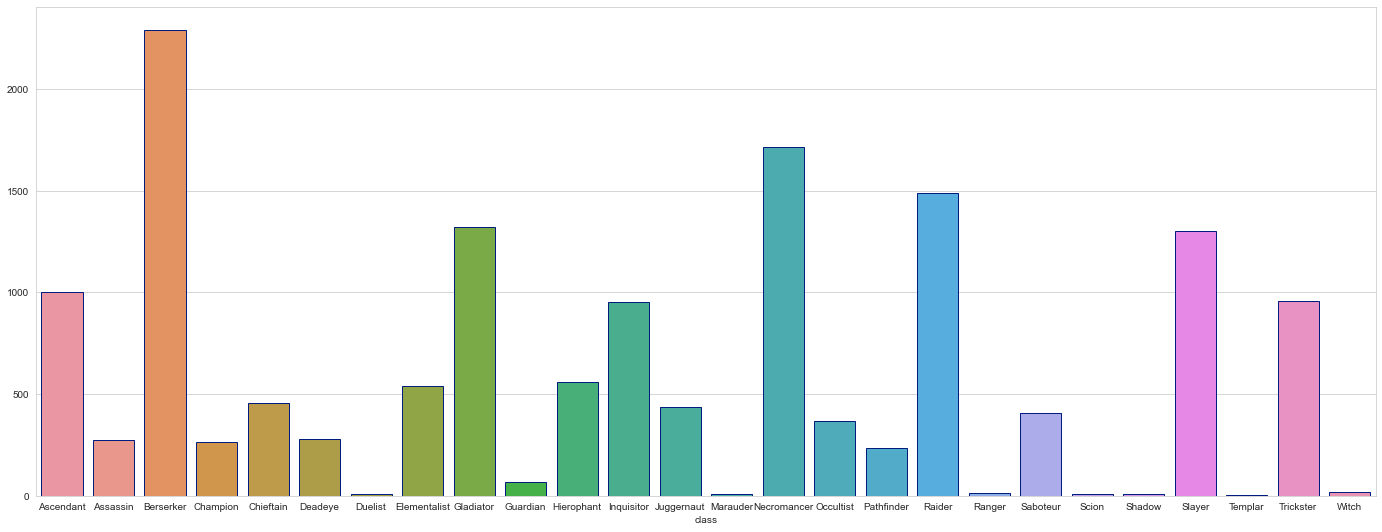

In [17]:
# 위와 같은 그래프를 그리게 되지만 ...

plt.rcParams["figure.figsize"] = (24, 9)
sns.barplot(data = pivot_countuser_class_ssf,
            edgecolor=sns.color_palette("dark", 1))
plt.show()

In [18]:
# SSF가 아닌 모드 클래스별 유저 수

pivot_countuser_class_non_ssf = non_ssf.pivot_table(values = 'id', columns = 'class', aggfunc = 'count')
pivot_countuser_class_non_ssf.transpose()

,id
class,
Ascendant,1889
Assassin,180
Berserker,4777
Champion,616
Chieftain,981
Deadeye,246
Elementalist,353
Gladiator,2004
Guardian,1010


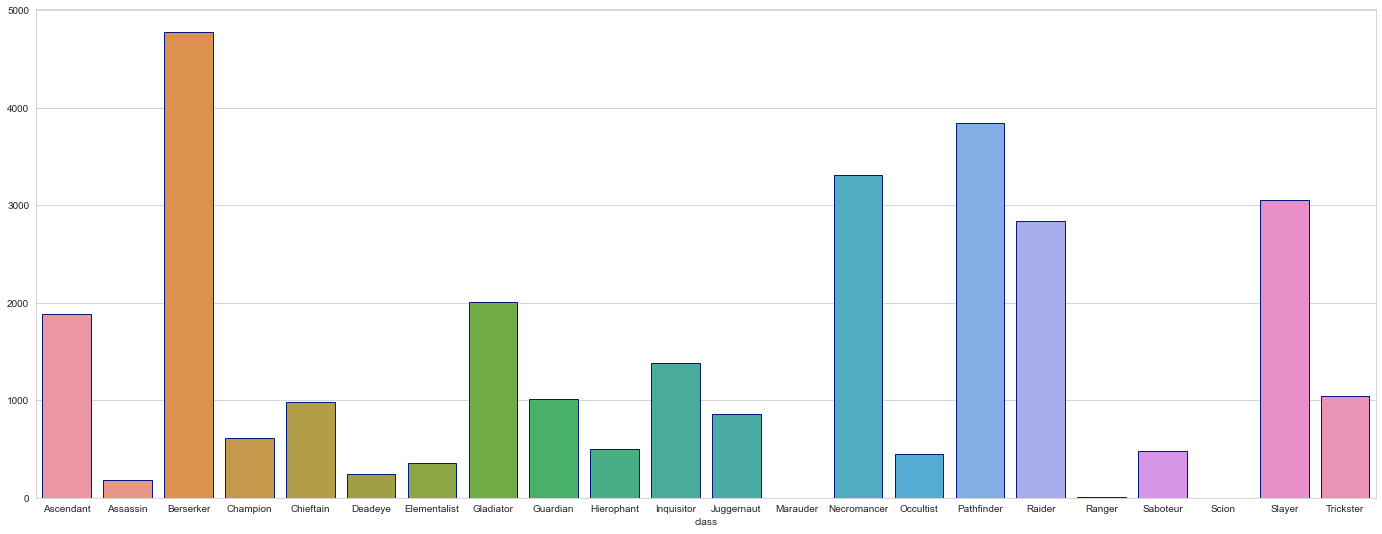

In [19]:
plt.rcParams["figure.figsize"] = (24, 9)
sns.barplot(data = pivot_countuser_class_non_ssf,
            edgecolor=sns.color_palette("dark", 1))
plt.show()

## class- rank 

### Mean rank

In [ ]:
# 논 하드코어 모드의 클래스별 평균 랭크

pivot_meanrank_class_ssf = ssf.pivot_table(values = 'rank', columns = 'class', aggfunc = 'mean')
pivot_meanrank_class_ssf.transpose()

In [ ]:
pivot_meanrank_class_ssf.transpose().mean()

In [ ]:
plt.rcParams["figure.figsize"] = (24, 9)
plt.ylim(5000, 15000)
sns.barplot(data = pivot_meanrank_class_ssf,
            edgecolor=sns.color_palette("dark", 1))
plt.show()

In [ ]:
# 하드코어 모드의 클래스별 평균 랭크

pivot_meanrank_class_non_ssf = non_ssf.pivot_table(values = 'rank', columns = 'class', aggfunc = 'mean')
pivot_meanrank_class_non_ssf.transpose()

In [ ]:
pivot_meanrank_class_non_ssf.transpose().mean()

In [ ]:
plt.rcParams["figure.figsize"] = (24, 9)
plt.ylim(5000, 15000)
sns.barplot(data = pivot_meanrank_class_non_ssf,
            edgecolor=sns.color_palette("dark", 1))
plt.show()

### Min rank

스케일이 많이 다르기 때문에 그래프로는 비교하기 쉽지 않음을 이해해야 한다. 그대로 표로 보기로 한다.

In [ ]:
# 논 하드코어 모드의 클래스별 최소 랭크 (가장 높은 랭크)

pivot_minrank_class_ssf = ssf.pivot_table(values = 'rank', columns = 'class', aggfunc = 'min')
pivot_minrank_class_ssf.transpose()

In [ ]:
pivot_minrank_class_ssf.transpose().mean()

In [ ]:
# 하드코어 모드의 클래스별 최소 랭크 (가장 높은 랭크)

pivot_minrank_class_non_ssf = non_ssf.pivot_table(values = 'rank', columns = 'class', aggfunc = 'min')
pivot_minrank_class_non_ssf.transpose()

In [ ]:
pivot_minrank_class_non_ssf.transpose().mean()

## class- level

### Mean level

In [ ]:
# 논 하드코어 모드의 클래스별 평균 레벨

pivot_meanlevel_class_ssf = ssf.pivot_table(values = 'level', columns = 'class', aggfunc = 'mean')
pivot_meanlevel_class_ssf.transpose()

In [ ]:
pivot_meanlevel_class_ssf.transpose().mean()

In [ ]:
plt.rcParams["figure.figsize"] = (24, 9)
plt.ylim(50, 100)
sns.barplot(data = pivot_meanlevel_class_ssf,
            edgecolor=sns.color_palette("dark", 1))
plt.show()

In [ ]:
# 하드코어 모드의 클래스별 평균 레벨

pivot_meanlevel_class_non_ssf = non_ssf.pivot_table(values = 'level', columns = 'class', aggfunc = 'mean')
pivot_meanlevel_class_non_ssf.transpose()

In [ ]:
pivot_meanlevel_class_non_ssf.transpose().mean()

In [ ]:
plt.rcParams["figure.figsize"] = (24, 9)
plt.ylim(50, 100)
sns.barplot(data = pivot_meanlevel_class_non_ssf,
            edgecolor=sns.color_palette("dark", 1))
plt.show()

### Min level

In [ ]:
# 논 하드코어 모드의 클래스별 최소 레벨 

pivot_minlevel_class_ssf = ssf.pivot_table(values = 'level', columns = 'class', aggfunc = 'min')
pivot_minlevel_class_ssf.transpose()

In [ ]:
pivot_minlevel_class_ssf.transpose().mean()

In [ ]:
# 하드코어 모드의 클래스별 최소 레벨

pivot_minlevel_class_non_ssf = non_ssf.pivot_table(values = 'level', columns = 'class', aggfunc = 'min')
pivot_minlevel_class_non_ssf.transpose()

In [ ]:
pivot_minlevel_class_non_ssf.transpose().mean()

### Commentary

non_ssf모드의 최소레벨이 모든 클래스에서 53 레벨로 나타났다. 이것으로 보아 non_ssf모드에 진입할 수 있는 최소 레벨 제한이 53레벨이 아닐까 하는 추측을 해볼 수 있을 것 같다.

## class - challenges

### Mean challenges

In [ ]:
# 논 하드코어 모드의 클래스별 평균 트라이 회수

pivot_meanchal_class_ssf = ssf.pivot_table(values = 'challenges', columns = 'class', aggfunc = 'mean')
pivot_meanchal_class_ssf.transpose()

In [ ]:
pivot_meanchal_class_ssf.transpose().mean()

In [ ]:
plt.rcParams["figure.figsize"] = (24, 9)
sns.barplot(data = pivot_meanchal_class_ssf,
            edgecolor=sns.color_palette("dark", 1))
plt.show()

In [ ]:
# 하드코어 모드의 클래스별 평균 트라이 회수

pivot_meanchal_class_non_ssf = non_ssf.pivot_table(values = 'challenges', columns = 'class', aggfunc = 'mean')
pivot_meanchal_class_non_ssf.transpose()

In [ ]:
pivot_meanchal_class_non_ssf.transpose().mean()

In [ ]:
plt.rcParams["figure.figsize"] = (24, 9)
sns.barplot(data = pivot_meanchal_class_non_ssf,
            edgecolor=sns.color_palette("dark", 1))
plt.show()

### Min Challenges

In [ ]:
# 논 하드코어 모드의 클래스별 최소 트라이 횟수

pivot_minchal_class_ssf = ssf.pivot_table(values = 'challenges', columns = 'class', aggfunc = 'min')
pivot_minchal_class_ssf.transpose()

In [ ]:
pivot_minchal_class_ssf.transpose().mean()

In [ ]:
plt.rcParams["figure.figsize"] = (24, 9)
sns.barplot(data = pivot_minchal_class_ssf,
            edgecolor=sns.color_palette("dark", 1))
plt.show()

In [ ]:
# 하드코어 모드의 클래스별 최소 트라이 횟수

pivot_minchal_class_non_ssf = non_ssf.pivot_table(values = 'challenges', columns = 'class', aggfunc = 'min')
pivot_minchal_class_non_ssf.transpose()

In [ ]:
pivot_minchal_class_non_ssf.transpose().mean()

In [ ]:
plt.rcParams["figure.figsize"] = (24, 9)
sns.barplot(data = pivot_minchal_class_non_ssf,
            edgecolor=sns.color_palette("dark", 1))
plt.show()

## rank

--- 

여기서부터는 클래스와 떼어서 각각을 보려 한다.

### ssf level distribution

In [ ]:
plt.rcParams["figure.figsize"] = (15, 6)
sns.set_style('whitegrid')
sns.countplot(data = ssf, x = 'level', 
              palette="Blues", edgecolor=sns.color_palette("dark", 1)) #palette = Accent
plt.show()

### non_ssf level distribution

In [ ]:
plt.rcParams["figure.figsize"] = (15, 6)
sns.set_style('whitegrid')
sns.countplot(data = non_ssf, x = 'level', 
              palette="Blues", edgecolor=sns.color_palette("dark", 1)) #palette = Accent
plt.show()

## exp

경험치는 연속형 변수이기 때문에 구간을 나누어주어서 간단하게 분포를 보려한다. 

### ssf exp distribution

In [ ]:
ssf.hist(column = 'experience', figsize=(15,6), bins=50)

### non_ssf exp distribution

In [ ]:
non_ssf.hist(column = 'experience', figsize = (15,6), bins = 50)

## online

### ssf online or offline

In [ ]:
plt.rcParams["figure.figsize"] = (3, 5)
sns.set_style('whitegrid')
sns.countplot(data = ssf, x = 'online', 
              palette="Set3", edgecolor=sns.color_palette("dark", 1))
plt.show()

### non_ssf online or offline

In [ ]:
plt.rcParams["figure.figsize"] = (3, 5)
sns.set_style('whitegrid')
sns.countplot(data = non_ssf, x = 'online', 
              palette="Set3", edgecolor=sns.color_palette("dark", 1))
plt.show()

online 자체의 큰 의미는 있어보이지 않지만, 데이터를 얻었을 당시 랭커들 중에는 접속중이지 않은 사람이 훨씬 많다. 그럼 전체 중 접속률은?

In [ ]:
ssf['online'].value_counts()/sum(ssf['online'].value_counts())*100

In [ ]:
non_ssf['online'].value_counts()/sum(non_ssf['online'].value_counts())*100

### Commentary

ssf mode's rankers online rate = 2.4%

non_ssf mode's rankers online rate = 0.4%

## 3 stats and thier corr

### ssf

In [ ]:
ssf[['class', 'stat_Str', 'stat_Int', 'stat_Dex', 'stats_num']].sample(10)

In [ ]:
ssf[['class', 'stat_Str', 'stat_Int', 'stat_Dex', 'stats_num']].corr()

In [ ]:
plt.rcParams["figure.figsize"] = (4, 4)
sns.heatmap(ssf[['stat_Str', 'stat_Int', 'stat_Dex', 'stats_num']].corr(),
            annot = True, square=True, cmap = 'PuRd_r')
plt.show()

### non_ssf

In [ ]:
non_ssf[['class', 'stat_Str', 'stat_Dex', 'stat_Int', 'stats_num']].sample(10)

In [ ]:
non_ssf[['class', 'stat_Str', 'stat_Dex', 'stat_Int', 'stats_num']].corr()

In [ ]:
sns.heatmap(data = non_ssf[['class', 'stat_Str', 'stat_Dex', 'stat_Int', 'stats_num']].corr(), 
           annot = True, cmap = 'PuRd_r', square = True)

### Commentary

상관관계는 크게 눈에 띄는 것은 없었지만 stats_num 을 보면 ssf는 Str과, non_ssf는 Dex와 상관관계가 높은 것을 볼 수 있었다.

이것만 보아도 어떤 스탯이 좀더 많은 선호도를 보이고 있는지 간단히 확인할 수 있다.